In [1]:
import torch 
import numpy as np 
np.set_printoptions(precision=2)
a=[1,2,3]
b=np.array([4,5,6],dtype=np.int32)  
t_a=torch.tensor(a)
t_b=torch.tensor(b)
print(t_a)
print(t_b)

t_ones=torch.ones(2,3)
print(t_ones.shape)
print(t_ones)


t_rand=torch.rand(2,3)
print(t_rand)


tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)
torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.1046, 0.5984, 0.7557],
        [0.4638, 0.9440, 0.0313]])


In [2]:
# Manipulate tensors : cast reshape, tranpose and squeeze
t_a_new = t_a.to(dtype=torch.float64)
print(t_a_new)

tensor([1., 2., 3.], dtype=torch.float64)


In [3]:
t=torch.rand(3,4)
print(t)
t=t.reshape(1,12)
print(t)
t=t.transpose(0,1)
print(t)

t=torch.squeeze(t.reshape(3,4),1)
print(t)

tensor([[0.0956, 0.9635, 0.0913, 0.4271],
        [0.4638, 0.5395, 0.2919, 0.4348],
        [0.4016, 0.6354, 0.8562, 0.7989]])
tensor([[0.0956, 0.9635, 0.0913, 0.4271, 0.4638, 0.5395, 0.2919, 0.4348, 0.4016,
         0.6354, 0.8562, 0.7989]])
tensor([[0.0956],
        [0.9635],
        [0.0913],
        [0.4271],
        [0.4638],
        [0.5395],
        [0.2919],
        [0.4348],
        [0.4016],
        [0.6354],
        [0.8562],
        [0.7989]])
tensor([[0.0956, 0.9635, 0.0913, 0.4271],
        [0.4638, 0.5395, 0.2919, 0.4348],
        [0.4016, 0.6354, 0.8562, 0.7989]])


In [4]:
t=torch.zeros(1,2,1,4,1)
print(t)
t_sqz=torch.squeeze(t,2)
print(t_sqz)
print(t.shape,"-->",t_sqz.shape)

tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])
tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])
torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [5]:
torch.manual_seed(42)
t1=2*torch.rand(5,2)-1
t2=torch.normal(mean=0,std=1,size=(5,2))

print(t1)
print(t2)
# Element wise operations

t3=torch.multiply(t1,t2)
print("torch product:",t3)
t4= torch.mean(t1,axis=0)
print("torch mean :",t4)



tensor([[ 0.7645,  0.8300],
        [-0.2343,  0.9186],
        [-0.2191,  0.2018],
        [-0.4869,  0.5873],
        [ 0.8815, -0.7336]])
tensor([[-2.4661,  0.3623],
        [ 0.3765, -0.1808],
        [ 0.3930,  0.4327],
        [-1.3627,  1.3564],
        [ 0.6688, -0.7077]])
torch product: tensor([[-1.8854,  0.3007],
        [-0.0882, -0.1661],
        [-0.0861,  0.0873],
        [ 0.6634,  0.7966],
        [ 0.5896,  0.5192]])
torch mean : tensor([0.1412, 0.3608])


In [6]:
# matrix matrix multiplication
t5=torch.matmul(t1,torch.transpose(t2,0,1))
print(t5)

t6 = torch.matmul(torch.transpose(t1,0,1),t2)
print(t6)

tensor([[-1.5847e+00,  1.3781e-01,  6.5963e-01,  8.4011e-02, -7.6090e-02],
        [ 9.1053e-01, -2.5431e-01,  3.0541e-01,  1.5653e+00, -8.0679e-01],
        [ 6.1343e-01, -1.1899e-01,  1.2010e-03,  5.7229e-01, -2.8934e-01],
        [ 1.4134e+00, -2.8951e-01,  6.2770e-02,  1.4601e+00, -7.4123e-01],
        [-2.4397e+00,  4.6459e-01,  2.9030e-02, -2.1964e+00,  1.1088e+00]])
tensor([[-0.8067, -1.0597],
        [-2.9126,  1.5377]])


In [7]:
norm_t1=torch.linalg.norm(t1,ord=2,dim=1)
print(norm_t1)

tensor([1.1285, 0.9480, 0.2979, 0.7628, 1.1469])


In [8]:
from torch.utils.data import DataLoader
t=torch.arange(6, dtype=torch.float32).reshape(2,3)
data_loader=DataLoader(t,batch_size=3)
for data in data_loader:
    print(data)
    break

tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [9]:
from torch.utils.data import TensorDataset
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = TensorDataset(t1,t2)
for example in joint_dataset:
    print(example)


(tensor([0.7645, 0.8300]), tensor([-2.4661,  0.3623]))
(tensor([-0.2343,  0.9186]), tensor([ 0.3765, -0.1808]))
(tensor([-0.2191,  0.2018]), tensor([0.3930, 0.4327]))
(tensor([-0.4869,  0.5873]), tensor([-1.3627,  1.3564]))
(tensor([ 0.8815, -0.7336]), tensor([ 0.6688, -0.7077]))


In [10]:
# when training a model for multiple epochs, we need to shuffle and iterate over the dataset 
# by the desired number of epochs. 
for epoch in range(2):
    print(f'epoch {epoch+1}')
    data_loader = DataLoader(joint_dataset, batch_size=2, shuffle=True)
    for data in data_loader:
        print(data)
    print("End of epoch:",epoch+1)

epoch 1
[tensor([[-0.4869,  0.5873],
        [-0.2191,  0.2018]]), tensor([[-1.3627,  1.3564],
        [ 0.3930,  0.4327]])]
[tensor([[-0.2343,  0.9186],
        [ 0.8815, -0.7336]]), tensor([[ 0.3765, -0.1808],
        [ 0.6688, -0.7077]])]
[tensor([[0.7645, 0.8300]]), tensor([[-2.4661,  0.3623]])]
End of epoch: 1
epoch 2
[tensor([[-0.2343,  0.9186],
        [ 0.8815, -0.7336]]), tensor([[ 0.3765, -0.1808],
        [ 0.6688, -0.7077]])]
[tensor([[-0.2191,  0.2018],
        [-0.4869,  0.5873]]), tensor([[ 0.3930,  0.4327],
        [-1.3627,  1.3564]])]
[tensor([[0.7645, 0.8300]]), tensor([[-2.4661,  0.3623]])]
End of epoch: 2


In [11]:
# image data set
from os import path
import pathlib
img_dir =pathlib.Path("cat-dogs-images")
file_list=sorted([str(path) for path in img_dir.glob("*.jpg")])
print(file_list)

['cat-dogs-images/cat-01.jpg', 'cat-dogs-images/cat-02.jpg', 'cat-dogs-images/cat-03.jpg', 'cat-dogs-images/dog-01.jpg', 'cat-dogs-images/dog-02.jpg', 'cat-dogs-images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


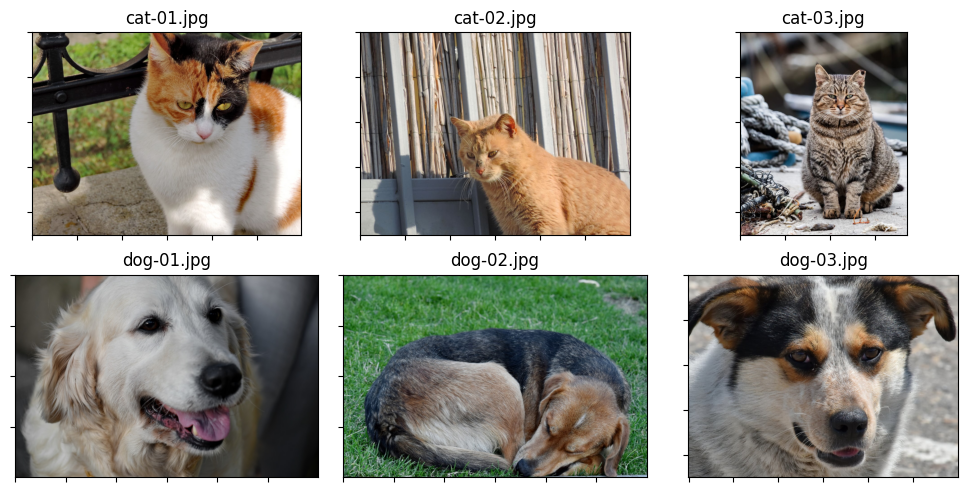

In [12]:
import matplotlib.pyplot as plt
import os 
from PIL import Image
fig = plt.figure(figsize=(10,5))
for i,file in enumerate(file_list):
    img=Image.open(file)
    print("Image shape:",np.array(img).shape)
    ax=fig.add_subplot(2,3,i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file))
plt.tight_layout()
plt.show()


In [13]:
labels= [1 if "dog" in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [14]:
# using torchvision to transform the images 
from torchvision import transforms
img_height,img_width=64,64
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height,img_width)),
    transforms.RandomHorizontalFlip(),
])



In [15]:
# Create Image dataset class 
from torch.utils.data import Dataset
class ImageDataset(Dataset):
    def __init__(self,file_list,labels,transform=None): 
        self.file_list=file_list
        self.labels=labels
        self.transform=transform
    def __getitem__(self,index):
        img=Image.open(self.file_list[index])
        if self.transform:
            img=self.transform(img)
        label=self.labels[index]
        return img,label

    def __len__(self):
        return len(self.file_list)
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0014870425..1.0000005].


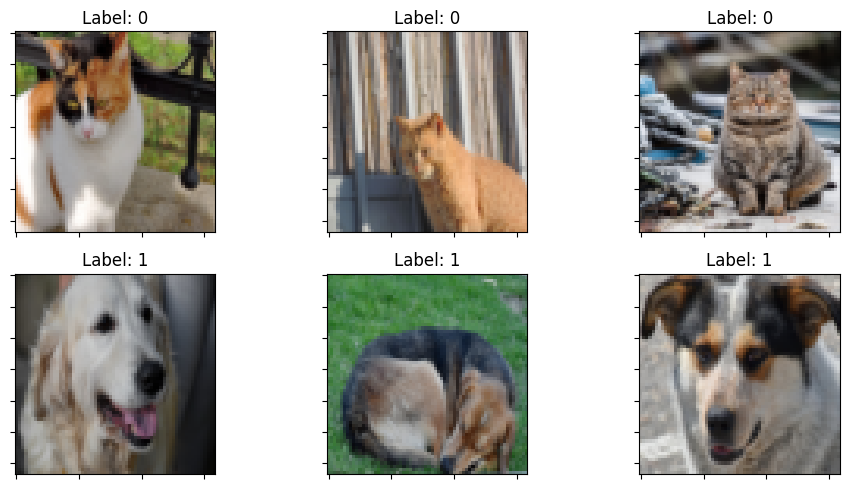

In [16]:

image_dataset=ImageDataset(file_list,labels,transform)
fig=plt.figure(figsize=(10,5))

for i, example in enumerate(image_dataset):
    img,label=example
    ax=fig.add_subplot(2,3,i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(img.permute(1,2,0))
    ax.set_title(f"Label: {label}")
    
plt.tight_layout()
plt.show()

In [17]:
import torchvision
minist_datasset=torchvision.datasets.MNIST(root="/mnt/c9f28c3e-b27b-4e9a-9ba4-cf62e6a3b171/ml-stuff/perceptron/perceptron-scratch/",train=True,download=True)
assert isinstance(minist_datasset,torchvision.datasets.MNIST)
example=next(iter(minist_datasset))
print((example))

(<PIL.Image.Image image mode=L size=28x28 at 0x73E574151000>, 5)


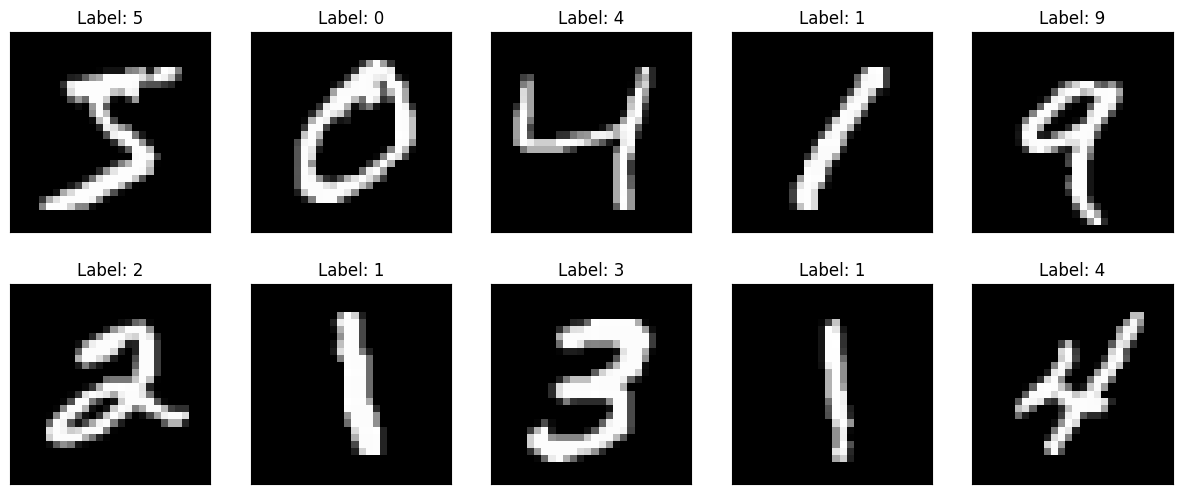

In [18]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(minist_datasset):
    if i == 10:
        break
    ax = fig.add_subplot(2, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')

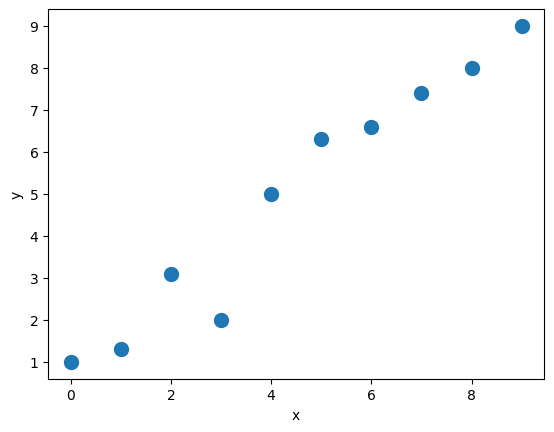

In [19]:
# Torch NN
import torch.nn as nn
X_train = np.arange(10, dtype=np.float32).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype=np.float32)
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:

from torch.utils.data import TensorDataset
X_train_norm =( X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds=TensorDataset(X_train_norm,y_train)
batch_size=1
train_dl=DataLoader(train_ds,batch_size,shuffle=True)

In [21]:
# weight and bias
w=torch.randn(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)
def model(x):
    return x @ w.t() + b
def loss_fn(input,target):
    return (input-target).pow(2).mean()
    

In [22]:
learning_rate=0.01
n_epochs=200
log_epochs=10
for epoch in range(n_epochs):
    for x_batch,y_batch in train_dl:
        pred=model(x_batch)
        loss=loss_fn(pred,y_batch)
        loss.backward()
    with torch.no_grad():
        w-=learning_rate*w.grad
        b-=learning_rate*b.grad
        w.grad.zero_()
        b.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch+1}, Loss {loss.item()}')

Epoch 1, Loss 48.26677703857422
Epoch 11, Loss 0.30393698811531067
Epoch 21, Loss 0.30705273151397705
Epoch 31, Loss 0.7489383220672607
Epoch 41, Loss 0.0056030345149338245
Epoch 51, Loss 2.422098398208618
Epoch 61, Loss 0.1380212903022766
Epoch 71, Loss 0.7375193238258362
Epoch 81, Loss 0.04681375250220299
Epoch 91, Loss 0.005467305425554514
Epoch 101, Loss 0.005467305425554514
Epoch 111, Loss 0.073391854763031
Epoch 121, Loss 0.7375193238258362
Epoch 131, Loss 0.04681375250220299
Epoch 141, Loss 0.073391854763031
Epoch 151, Loss 0.07208320498466492
Epoch 161, Loss 0.23625539243221283
Epoch 171, Loss 0.07208320498466492
Epoch 181, Loss 0.073391854763031
Epoch 191, Loss 0.13802306354045868


Final Parameters: 2.706907033920288 4.969998836517334


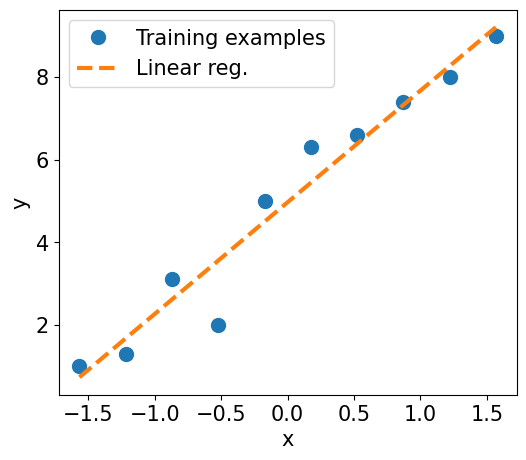

In [23]:
print('Final Parameters:', w.item(), b.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size=1
output_size=1
model=nn.Linear(input_size,output_size)
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_epochs):
    for x_batch,y_batch in train_dl:
        pred = model(x_batch)[:,0] # generate predictions
        loss = loss_fn(pred,y_batch) # calculate loss
        loss.backward() # compute gradients
        optimizer.step() # update parameters
        optimizer.zero_grad() # reset gradients
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch+1}, Loss {loss.item()}')
print('Final Parameters:', model.weight.item(), model.bias.item())

Epoch 1, Loss 4.731184005737305
Epoch 11, Loss 0.00087288289796561
Epoch 21, Loss 2.321763515472412
Epoch 31, Loss 0.06866253167390823
Epoch 41, Loss 0.07905114442110062
Epoch 51, Loss 0.006867279764264822
Epoch 61, Loss 0.254549503326416
Epoch 71, Loss 0.04884256049990654
Epoch 81, Loss 2.5364866256713867
Epoch 91, Loss 0.1584281027317047
Epoch 101, Loss 0.14980155229568481
Epoch 111, Loss 0.271894246339798
Epoch 121, Loss 0.766205906867981
Epoch 131, Loss 0.2581205666065216
Epoch 141, Loss 0.7629703879356384
Epoch 151, Loss 0.0852920189499855
Epoch 161, Loss 0.07801900058984756
Epoch 171, Loss 0.15163812041282654
Epoch 181, Loss 2.5476138591766357
Epoch 191, Loss 0.07494445145130157
Final Parameters: 2.7061495780944824 4.963548183441162


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()
X=iris["data"]
y=iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1./2,random_state=1)
X_train_norm=(X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
X_train_norm=torch.from_numpy(X_train_norm).float()
y_train=torch.from_numpy(y_train)
train_ds=TensorDataset(X_train_norm,y_train)
torch.manual_seed(1)
batch_size=2
train_dl=DataLoader(train_ds,batch_size,shuffle=True)

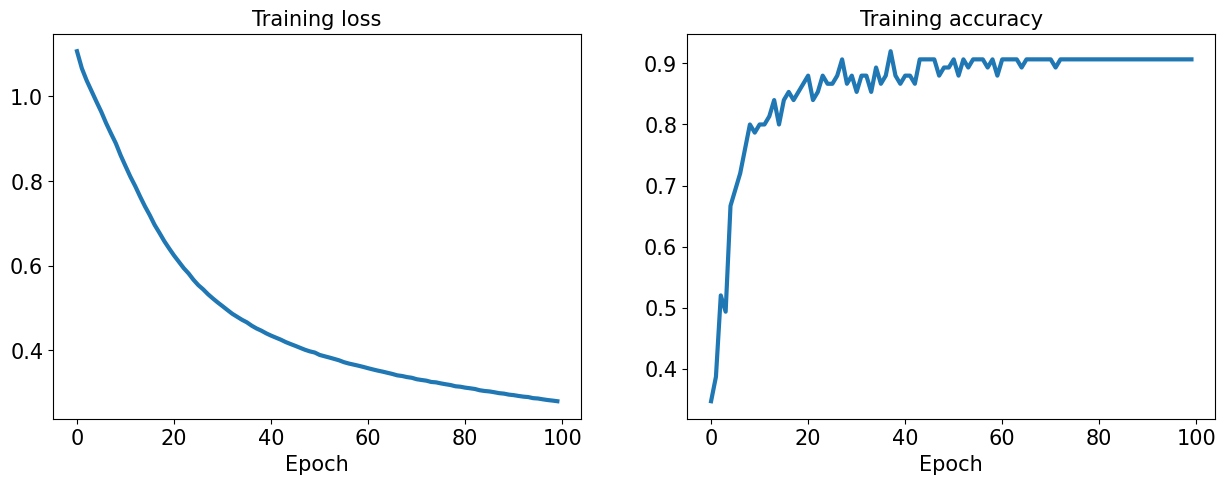

In [31]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)  # Fixed: Input to hidden
        self.layer_2 = nn.Linear(hidden_size, output_size) # Fixed: Hidden to output

    def forward(self, x):
        x = self.layer_1(x)  # Use layer_1
        x = nn.Sigmoid()(x)  # Apply activation after layer_1
        x = self.layer_2(x)  # Use layer_2 for final output
        return x             # Return the output

# Initialize the model and other variables
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.01
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 100
loss_history = [0] * n_epochs
accuracy_hist = [0] * n_epochs

# Training loop
for epoch in range(n_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)  # Get model predictions
        loss = loss_fn(pred, y_batch)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        optimizer.zero_grad()  # Reset gradients

        loss_history[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, 1) == y_batch).type(torch.float)
        accuracy_hist[epoch] += is_correct.sum()

    loss_history[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

# Plotting the loss and accuracy
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_history, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()


In [32]:
# now test the model the and evaluate the model
X_test_norm = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
test_loss = loss_fn(pred_test, y_test)
is_correct = (torch.argmax(pred_test, 1) == y_test).type(torch.float)
test_accuracy = is_correct.sum() / len(y_test)
print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy.item():.4f}')

Test Loss: 0.2955, Test Accuracy: 0.9333


In [36]:
# save the model
torch.save(model, 'iris_model.pth')

In [37]:
# load the model 
model_new=torch.load('iris_model.pth')  
model_new.eval()

/tmp/ipykernel_190439/422447646.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new=torch.load('iris_model.pth')


Model(
  (layer_1): Linear(in_features=4, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=3, bias=True)
)

In [38]:
pred_test = model_new(X_test_norm)
is_correct = (torch.argmax(pred_test, 1) == y_test).type(torch.float)
test_accuracy = is_correct.sum() / len(y_test)
print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy.item():.4f}')

Test Loss: 0.2955, Test Accuracy: 0.9333


In [39]:
# if you want to save the laearned parameter you can use the save state but then we need to create the model again
torch.save(model.state_dict(), 'iris_model_state.pth')
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load('iris_model_state.pth'))

/tmp/ipykernel_190439/2037485605.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new.load_state_dict(torch.load('iris_model_state.pth'))


<All keys matched successfully>

In [ ]:
# choosing the activation function
